In [ ]:
!pip install torchinfo

In [ ]:
import os
import pathlib as path
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
import joblib
import time
from PIL import Image
import kagglehub
import cv2
from sklearn.utils import resample
from torch.utils.data import Subset

########### Pytorch Imports #################
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import torchvision.models as models
from torchinfo import summary

######### Sklearn Import s###################3
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import kagglehub

original_path = kagglehub.dataset_download("ismailpromus/skin-diseases-image-dataset", "/")

print("Path to dataset files:", original_path)

Path to dataset files: /kaggle/input/skin-diseases-image-dataset//


/kaggle/input/skin-diseases-image-dataset///IMG_CLASSES
Class counts: [1677, 2103, 3323, 2055, 7970, 1702, 1257, 2079, 1847, 3140]


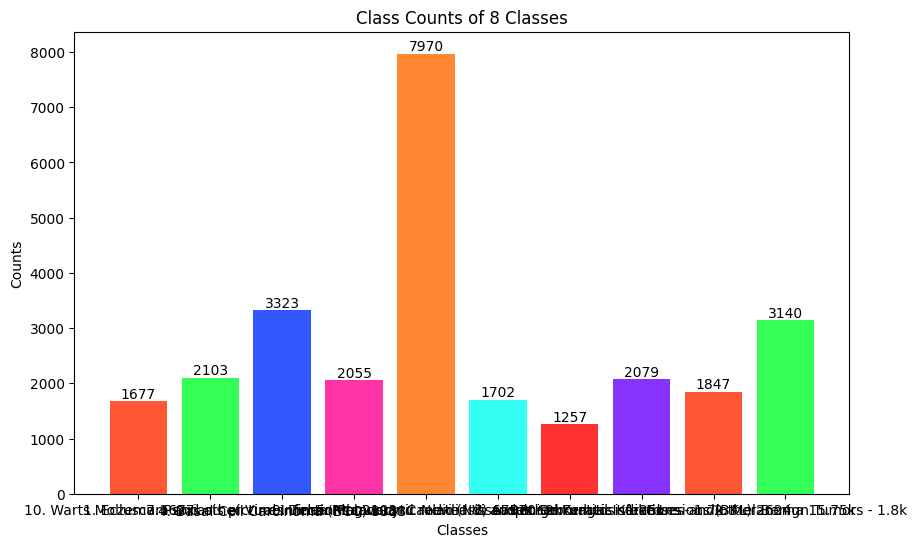

In [ ]:
path = original_path
path += "/IMG_CLASSES"
print(path)
classes = os.listdir(path)
class_counts = [len(os.listdir(path + '/' + x)) for x in classes]
print("Class counts:", class_counts)


# Visualize class counts
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, class_counts, color=[
    '#FF5733', '#33FF57', '#3357FF', '#FF33A6',
    '#FF8633', '#33FFF3', '#FF3333', '#8633FF'
])
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Class Counts of 8 Classes')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )
plt.show()

In [ ]:
import os
import shutil

source_path = original_path
destination_path = "/content"

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy the contents instead of moving
try:
    shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
    print(f"Dataset copied from {source_path} to {destination_path}")
except Exception as e:
    print(f"Error copying dataset: {e}")

# Update the 'path' variable to reflect the new location
path = destination_path + "/IMG_CLASSES"
print(f"Updated dataset path: {path}")

Dataset copied from /kaggle/input/skin-diseases-image-dataset// to /content
Updated dataset path: /content/IMG_CLASSES


In [ ]:
import os
import numpy as np
from sklearn.utils import resample

img_classes_path = path

classes = os.listdir(img_classes_path)

class_counts = [len(os.listdir(os.path.join(img_classes_path, x))) for x in classes]

# Find the majority class and its count
majority_class_index = np.argmax(class_counts)
majority_class_name = classes[majority_class_index]
majority_class_count = class_counts[majority_class_index]
print(f"Majority class: {majority_class_name} with {majority_class_count} samples")

target_majority_count = min(majority_class_count, 2000)
print(f"Target majority class count after undersampling (max 2000): {target_majority_count}")
# Get all file paths for the majority class
majority_class_dir = os.path.join(img_classes_path, majority_class_name)
print("here here ",len(os.listdir(majority_class_dir)))
majority_class_files = [os.path.join(majority_class_dir, f) for f in os.listdir(majority_class_dir)]

# Randomly select files to keep from the majority class
files_to_keep = resample(majority_class_files,
                         replace=False,
                         n_samples=target_majority_count,
                         random_state=123)

files_to_remove = [f for f in majority_class_files if f not in files_to_keep]

print(f"\nUndersampling {majority_class_name} class...")
print(f"Initial files: {len(majority_class_files)}")
print(f"Files to keep: {len(files_to_keep)}")
print(f"Files to remove: {len(files_to_remove)}")

# Remove the excess files

import traceback
for file_path in files_to_remove:
    try:
        print(f"Attempting to remove: {file_path}")
        if not os.path.exists(file_path):
            print(f"Warning: File listed for removal does not exist: {file_path}")
            continue
        os.remove(file_path)
    except OSError as e:
        print(f"Error removing file {file_path}: {e.strerror} (Error No: {e.errno})")
        print(traceback.format_exc())
    except Exception as ex:
        print(f"An unexpected error occurred while trying to remove {file_path}: {ex}")

print("Undersampling complete.")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0028339.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0000528.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0015149_downsampled.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0016022_downsampled.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0028987.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0028727.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0031032.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0025757.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0029143.jpg
Attempting to remove: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 

Class counts: [2000, 1847, 1257, 2055, 1702, 3140, 2103, 3323, 1677, 2079]


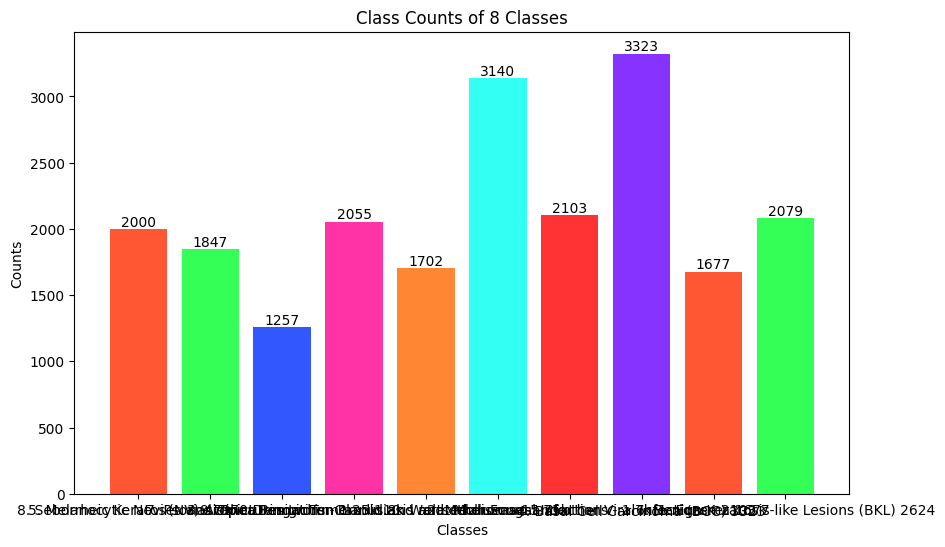

In [ ]:
classes = os.listdir(path)
class_counts = [len(os.listdir(path + '/' + x)) for x in classes]
print("Class counts:", class_counts)


# Visualize class counts
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, class_counts, color=[
    '#FF5733', '#33FF57', '#3357FF', '#FF33A6',
    '#FF8633', '#33FFF3', '#FF3333', '#8633FF'
])
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Class Counts of 8 Classes')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )
plt.show()

# Train Test Split
Write Python code to split images from a directory structure of `path/IMG_CLASSES/classnames` into `train` and `test` folders

In [ ]:
train_dir = "train"
test_dir = "test"

In [ ]:
classes = os.listdir(path)
classes_encoded = [x[:2] if x[:2] == '10' else x[0] for x in classes]
classes.sort()
classes_encoded.sort()
print(classes)
print(classes_encoded)

['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '2. Melanoma 15.75k', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '5. Melanocytic Nevi (NV) - 7970', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k']
['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
folder_to_class = {group[0]:group[1] for group in zip(classes, classes_encoded)}
print(folder_to_class)

{'1. Eczema 1677': '1', '10. Warts Molluscum and other Viral Infections - 2103': '10', '2. Melanoma 15.75k': '2', '3. Atopic Dermatitis - 1.25k': '3', '4. Basal Cell Carcinoma (BCC) 3323': '4', '5. Melanocytic Nevi (NV) - 7970': '5', '6. Benign Keratosis-like Lesions (BKL) 2624': '6', '7. Psoriasis pictures Lichen Planus and related diseases - 2k': '7', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k': '8', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k': '9'}


In [ ]:
from sklearn.model_selection import train_test_split

train_files_by_class = {}
test_files_by_class = {}

for cls in classes:
    class_dir = os.path.join(path, cls)
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

    train_files_by_class[cls] = train_files
    test_files_by_class[cls] = test_files

print("Number of training files per class:", {cls: len(files) for cls, files in train_files_by_class.items()})
print("Number of testing files per class:", {cls: len(files) for cls, files in test_files_by_class.items()})

Number of training files per class: {'1. Eczema 1677': 1341, '10. Warts Molluscum and other Viral Infections - 2103': 1682, '2. Melanoma 15.75k': 2512, '3. Atopic Dermatitis - 1.25k': 1005, '4. Basal Cell Carcinoma (BCC) 3323': 2658, '5. Melanocytic Nevi (NV) - 7970': 1600, '6. Benign Keratosis-like Lesions (BKL) 2624': 1663, '7. Psoriasis pictures Lichen Planus and related diseases - 2k': 1644, '8. Seborrheic Keratoses and other Benign Tumors - 1.8k': 1477, '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k': 1361}
Number of testing files per class: {'1. Eczema 1677': 336, '10. Warts Molluscum and other Viral Infections - 2103': 421, '2. Melanoma 15.75k': 628, '3. Atopic Dermatitis - 1.25k': 252, '4. Basal Cell Carcinoma (BCC) 3323': 665, '5. Melanocytic Nevi (NV) - 7970': 400, '6. Benign Keratosis-like Lesions (BKL) 2624': 416, '7. Psoriasis pictures Lichen Planus and related diseases - 2k': 411, '8. Seborrheic Keratoses and other Benign Tumors - 1.8k': 370, '9. Tinea 

In [ ]:
# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create class directories within train and test directories
for cls in classes:
    train_class_dir = os.path.join(train_dir, folder_to_class[cls])
    test_class_dir = os.path.join(test_dir, folder_to_class[cls])

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

print(f"Created train and test directories with class subdirectories")

Created train and test directories with class subdirectories


In [ ]:
import shutil

# Copy training images
print("Copying training images...")
for cls, files in train_files_by_class.items():
    dest_dir = os.path.join(train_dir, folder_to_class[cls])
    for file_path in tqdm(files, desc=f"Copying {cls} train images"):
        shutil.copy(file_path, dest_dir)

# Copy testing images
print("\nCopying testing images...")
for cls, files in test_files_by_class.items():
    dest_dir = os.path.join(test_dir, folder_to_class[cls])
    for file_path in tqdm(files, desc=f"Copying {cls} test images"):
        shutil.copy(file_path, dest_dir)

print("\nImage splitting and copying complete.")

Copying training images...


Copying 1. Eczema 1677 train images: 100%|██████████| 1341/1341 [00:02<00:00, 641.43it/s] 
Copying 10. Warts Molluscum and other Viral Infections - 2103 train images: 100%|██████████| 1682/1682 [00:02<00:00, 735.91it/s] 
Copying 2. Melanoma 15.75k train images: 100%|██████████| 2512/2512 [00:02<00:00, 987.11it/s] 
Copying 3. Atopic Dermatitis - 1.25k train images: 100%|██████████| 1005/1005 [00:00<00:00, 6548.34it/s]
Copying 4. Basal Cell Carcinoma (BCC) 3323 train images: 100%|██████████| 2658/2658 [00:14<00:00, 179.51it/s]
Copying 5. Melanocytic Nevi (NV) - 7970 train images: 100%|██████████| 1600/1600 [00:06<00:00, 259.41it/s]
Copying 6. Benign Keratosis-like Lesions (BKL) 2624 train images: 100%|██████████| 1663/1663 [00:07<00:00, 220.21it/s]
Copying 7. Psoriasis pictures Lichen Planus and related diseases - 2k train images: 100%|██████████| 1644/1644 [00:02<00:00, 661.24it/s] 
Copying 8. Seborrheic Keratoses and other Benign Tumors - 1.8k train images: 100%|██████████| 1477/1477 [


Copying testing images...


Copying 1. Eczema 1677 test images: 100%|██████████| 336/336 [00:00<00:00, 374.57it/s]
Copying 10. Warts Molluscum and other Viral Infections - 2103 test images: 100%|██████████| 421/421 [00:00<00:00, 442.49it/s]
Copying 3. Atopic Dermatitis - 1.25k test images: 100%|██████████| 252/252 [00:00<00:00, 469.46it/s]
Copying 4. Basal Cell Carcinoma (BCC) 3323 test images: 100%|██████████| 665/665 [00:03<00:00, 180.04it/s]
Copying 5. Melanocytic Nevi (NV) - 7970 test images: 100%|██████████| 400/400 [00:01<00:00, 283.12it/s]
Copying 6. Benign Keratosis-like Lesions (BKL) 2624 test images: 100%|██████████| 416/416 [00:01<00:00, 336.09it/s]
Copying 7. Psoriasis pictures Lichen Planus and related diseases - 2k test images: 100%|██████████| 411/411 [00:00<00:00, 1950.09it/s]
Copying 8. Seborrheic Keratoses and other Benign Tumors - 1.8k test images: 100%|██████████| 370/370 [00:00<00:00, 1409.41it/s]
Copying 9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k test images: 100%|█████


Image splitting and copying complete.


In [ ]:
for cls in classes:
    train_class_dir = os.path.join(train_dir, folder_to_class[cls])
    test_class_dir = os.path.join(test_dir, folder_to_class[cls])

    actual_train_count = len(os.listdir(train_class_dir))
    actual_test_count = len(os.listdir(test_class_dir))

    expected_train_count = len(train_files_by_class[cls])
    expected_test_count = len(test_files_by_class[cls])

    if actual_train_count == expected_train_count:
        print(f"Train count for class '{cls}' matches: {actual_train_count}")
    else:
        print(f"Train count mismatch for class '{cls}': Expected {expected_train_count}, Found {actual_train_count}")

    if actual_test_count == expected_test_count:
        print(f"Test count for class '{cls}' matches: {actual_test_count}")
    else:
        print(f"Test count mismatch for class '{cls}': Expected {expected_test_count}, Found {actual_test_count}")


Train count for class '1. Eczema 1677' matches: 1341
Test count for class '1. Eczema 1677' matches: 336
Train count for class '10. Warts Molluscum and other Viral Infections - 2103' matches: 1682
Test count for class '10. Warts Molluscum and other Viral Infections - 2103' matches: 421
Train count for class '2. Melanoma 15.75k' matches: 2512
Test count for class '2. Melanoma 15.75k' matches: 628
Train count for class '3. Atopic Dermatitis - 1.25k' matches: 1005
Test count for class '3. Atopic Dermatitis - 1.25k' matches: 252
Train count for class '4. Basal Cell Carcinoma (BCC) 3323' matches: 2658
Test count for class '4. Basal Cell Carcinoma (BCC) 3323' matches: 665
Train count for class '5. Melanocytic Nevi (NV) - 7970' matches: 1600
Test count for class '5. Melanocytic Nevi (NV) - 7970' matches: 400
Train count for class '6. Benign Keratosis-like Lesions (BKL) 2624' matches: 1663
Test count for class '6. Benign Keratosis-like Lesions (BKL) 2624' matches: 416
Train count for class '7. 

# Making train and test dataloaders and Transforming the data
we take the images from the forders we just made, transform them to what we want and make dataloaders

In [ ]:
class ToTensor:
  def __call__(self, image):
    return transforms.ToTensor()(image)


class AdaptiveHistEqualization:
    def __init__(self, clipLimit=2.0, tileGridSize=(8, 8)):
        self.clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)

    def __call__(self, image):
        image_np = np.array(image)  # Convert PIL Image to NumPy array
        if len(image_np.shape) == 2:  # Grayscale
            image_np = self.clahe.apply(image_np)
        else:  # Color
            image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2LAB)
            image_np[:, :, 0] = self.clahe.apply(image_np[:, :, 0])
            image_np = cv2.cvtColor(image_np, cv2.COLOR_LAB2RGB)
        return Image.fromarray(image_np.astype('uint8'))


class OneHotTransform:
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def __call__(self, target):
        return F.one_hot(torch.tensor(target), num_classes=self.num_classes).float()


def collate_fn(batch):
    images = [item[0] for item in batch]
    labels = [one_hot_transform(item[1]) for item in batch]  # Apply one-hot encoding here
    return torch.stack(images), torch.stack(labels)

In [ ]:
multiple_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    AdaptiveHistEqualization(),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    # transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
    ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = datasets.ImageFolder(root=f"train", transform=multiple_transforms)
test_dataset = datasets.ImageFolder(root=f"test", transform=multiple_transforms)

In [ ]:
num_classes = len(train_dataset.classes)
one_hot_transform = OneHotTransform(num_classes)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, num_workers=2, collate_fn=collate_fn)

print(len(train_loader))
print(len(train_loader.dataset))
print(len(test_loader))
print(len(test_loader.dataset))

530
16943
133
4240


# Utility funtions
things like the training and testing loop funtion, funtion to record training time, funtion to plot the losses and accuracy of the model in training and funtion to compute metrics like accuracy, precision, recall, confusion matrix etc.

In [ ]:
def record_training_time(func):
    '''
      A decorator function that takes another function and records the time it take to run
    '''
    def wrapper(*args, **kwargs):

        start_time = time.time() # start timer

        results = func(*args, **kwargs) # run function

        end_time = time.time() # end timer

        training_time = end_time - start_time # find the difference
        training_time /= 60.0

        return results, training_time  # Return training time along with other results
    return wrapper

In [ ]:
def plot_training_history(train_losses, train_accuracies, test_losses, test_accuracies):
    '''
      plots the losses and accuracies passed toghether respectively in one plot for inference and comparison.

      Args:
        train_losses (list): train losees from training loop
        train_accuracies (list): train accuracies from training loop
        test_losses (list): test losses from testing loop which is returned by the training loop
        test_losses (list): test accuracies from testing loop which is returned by the training loop

      Returns: None
    '''
    epochs = range(len(train_losses))  # Get the number of epochs

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.xlim(0, len(epochs))  # Set x-axis limit to the number of epochs
    plt.ylim(0, 1)  # Set y-axis limit to 1.1 times the maximum loss
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')
    plt.plot(epochs, test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlim(0, len(epochs))  # Set x-axis limit to the number of epochs
    plt.ylim(0, 1)  # Set y-axis limit to 1.1 times the maximum accuracy
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
@record_training_time
def training_loop(epochs, dataloader, model, loss_fn, optimizer, device, verbose=False, patience=4):
    '''
      Executes the training process for a specified number of epochs, tracks performance metrics,
      and evaluates the model using a testing loop after each epoch.

      Args:
        epochs (int): The number of training epochs.
        dataloader (DataLoader): The DataLoader for the training dataset, providing batches of data.
        model (nn.Module): The PyTorch model to be trained.
        loss_fn (nn.Module): The loss function to optimize (e.g., CrossEntropyLoss or BCELoss).
        optimizer (torch.optim.Optimizer): The optimizer used for updating model parameters (e.g., AdamOtimpizer or SGD).
        device (torch.device): The computation device ('cpu' or 'cuda') for running the training process.
        verbose (bool, optional): If True, prints detailed progress during training.

      Returns:
          tuple: A tuple containing four lists:
              - train_losses (list): The training loss for each epoch.
              - train_accuracies (list): The training accuracy for each epoch.
              - test_losses (list): The testing loss for each epoch.
              - test_accuracies (list): The testing accuracy for each epoch.
    '''

    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    size = len(dataloader.dataset)
    best_test_accuracy = float('-inf')
    epochs_no_improve = 0
    print("Starting training--------------", end="\n------------------------------------------------------\n")
    for epoch in range(epochs):
        train_loss = 0
        accuracy = 0
        model.train()
        for batch, (X, y) in enumerate(dataloader):

            X, y = X.to(device), y.to(device)

            pred = model(X)
            loss = loss_fn(pred, y)
            train_loss += loss.item()
            accuracy += (torch.argmax(pred, dim=1) == torch.argmax(y, dim=1)).type(torch.float).sum().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if verbose and (batch + 1) % 50 == 0:
              print(f"looked at {(batch+1)*len(X)}/{size} samples at epoch{epoch}...")
        train_loss /= size
        accuracy /= size
        train_losses.append(train_loss)
        train_accuracies.append(accuracy)

        # testing loop
        test_loss, test_accuracy = testing_loop(test_loader, model, loss_fn, device)
        if verbose:
          print()
          print(f"epoch: {epoch+1} | train_loss: {train_loss:.3f} | accuracy: {accuracy:.3f}")
          print(f"test_loss: {test_loss} | accuracy: {test_accuracy}", end="\n\n")

        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f"Early stopping triggered after epoch {epoch + 1}")
                break

    plot_training_history(train_losses, train_accuracies, test_losses, test_accuracies)

    return train_losses, train_accuracies, test_losses, test_accuracies


def testing_loop(dataloader, model, loss_fn, device):
    '''
      Executes the testing process and tracks performance metrics. It is meant to be run in the training loop function
      in order to save multiple losses and accuracies for plotting and visualisation.

      Args:
        dataloader (DataLoader): The DataLoader for the training dataset, providing batches of data.
        model (nn.Module): The PyTorch model to be trained.
        loss_fn (nn.Module): The loss function to optimize (e.g., CrossEntropyLoss or BCELoss).
        device (torch.device): The computation device ('cpu' or 'cuda') for running the training process.


      Returns:
          tuple: A tuple containing 2 values:
              - test_loss (int): the average loss across all batches
              - test_accuracy (int): the average accuracy across all batches
    '''
    size = len(dataloader.dataset)
    test_loss, test_accuracy = 0, 0
    model.eval()
    with torch.inference_mode():
      for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        predicted_labels = torch.argmax(pred, dim=1)
        true_labels = torch.argmax(y, dim=1)

        test_loss += loss_fn(pred, y).item()
        test_accuracy += (predicted_labels == true_labels).type(torch.float).sum().item()

    test_loss /= size
    test_accuracy /= size
    return test_loss, test_accuracy

In [ ]:
def evaluate_model(model, dataloader, device):
  """
  Evaluates the model and generates a classification report.

  Args:
    model: The trained PyTorch model.
    dataloader: The DataLoader for the dataset (test or validation).
    device: The device to run the model on ('cpu' or 'cuda').

  Returns:
    None (Prints the classification report)
  """

  model.eval()  # Set the model to evaluation mode
  all_predictions = []
  all_labels = []

  with torch.no_grad():  # Disable gradient computation during inference
    for images, labels in dataloader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)  # Get predicted class labels
      all_predictions.extend(predicted.cpu().numpy())
      all_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())  # Get true labels

  # Generate and print the classification report
  report = classification_report(all_labels, all_predictions)
  print(report, end="\n\n")

  cm = confusion_matrix(all_labels, all_predictions)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

# Model
we get a pretrained model from pytorch, freeze weights and change some layers and then we start training

In [ ]:
!nvidia-smi

Sat May 31 15:11:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   72C    P0             31W /   70W |    4944MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
print(torch.cuda.is_available())
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

True
Using cuda device


In [ ]:
effNet = models.efficientnet_b7(weights=models.EfficientNet_B7_Weights.IMAGENET1K_V1)

for param in effNet.features[:5].parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth
100%|██████████| 255M/255M [00:07<00:00, 37.8MB/s]


In [ ]:
classifier = effNet.classifier
input_layer = classifier[1].in_features

num_classes = len(train_dataset.classes)
print(num_classes)
print(input_layer)
effNet.classifier = nn.Sequential(
    nn.Linear(input_layer, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(4096, num_classes),
)

10
2560


In [ ]:
summary(effNet, input_size=(1, 3, 224, 224), col_names=["output_size", "num_params", "trainable"])

Layer (type:depth-idx)                                  Output Shape              Param #                   Trainable
EfficientNet                                            [1, 10]                   --                        Partial
├─Sequential: 1-1                                       [1, 2560, 7, 7]           --                        Partial
│    └─Conv2dNormActivation: 2-1                        [1, 64, 112, 112]         --                        False
│    │    └─Conv2d: 3-1                                 [1, 64, 112, 112]         (1,728)                   False
│    │    └─BatchNorm2d: 3-2                            [1, 64, 112, 112]         (128)                     False
│    │    └─SiLU: 3-3                                   [1, 64, 112, 112]         --                        --
│    └─Sequential: 2-2                                  [1, 32, 112, 112]         --                        False
│    │    └─MBConv: 3-4                                 [1, 32, 112, 112]         (

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(effNet.parameters(), lr=0.001, weight_decay=1e-5)

(training_losses, training_accuracies, test_losses, test_accuracies), total_training_time = training_loop(20, train_loader, effNet, loss_fn, optimizer, device, verbose=True)

print(f"Total training time: {total_training_time:.2f} minutes")

evaluate_model(effNet, test_loader, device)

Starting training--------------
------------------------------------------------------
looked at 1600/16943 samples at epoch0...
looked at 3200/16943 samples at epoch0...
looked at 4800/16943 samples at epoch0...
looked at 6400/16943 samples at epoch0...
looked at 8000/16943 samples at epoch0...
looked at 9600/16943 samples at epoch0...
looked at 11200/16943 samples at epoch0...
looked at 12800/16943 samples at epoch0...
looked at 14400/16943 samples at epoch0...
looked at 16000/16943 samples at epoch0...

epoch: 1 | train_loss: 0.035 | accuracy: 0.577
test_loss: 0.032156579800934164 | accuracy: 0.6181603773584906

looked at 1600/16943 samples at epoch1...
looked at 3200/16943 samples at epoch1...
looked at 4800/16943 samples at epoch1...
looked at 6400/16943 samples at epoch1...
looked at 8000/16943 samples at epoch1...
looked at 9600/16943 samples at epoch1...
looked at 11200/16943 samples at epoch1...
looked at 12800/16943 samples at epoch1...
looked at 14400/16943 samples at epoch1

### save model

In [ ]:
# save model

joblib.dump(resNet, 'model.pkl')